<a href="https://colab.research.google.com/github/elzipa-transparencia/Alerta-Mosquera/blob/main/Copy_of_Untitled17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title 🔌 Paso 1: Conectar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# @title 📊 Paso 2: Análisis de Datos
import pandas as pd
import matplotlib.pyplot as plt

# Verificar archivo
print("Contenido de la carpeta DATOS:")
!ls "/content/drive/My Drive/DATOS"

# Cargar datos (¡ajusta la ruta si es necesario!)
try:
    df = pd.read_csv("/content/drive/My Drive/DATOS/datosmosquera.csv", encoding="utf-8-sig")
    print("\n✅ CSV cargado correctamente. Columnas:", df.columns.tolist())

    # Filtrar Mosquera
    mosquera = df[df["Ciudad"].str.contains("MOSQUERA", case=False, na=False)]

    # Top 10 contratos
    top_contratos = mosquera.sort_values("Valor del Contrato", ascending=False).head(10)

    # Gráfico
    mosquera["Modalidad de Contratación"].value_counts().plot(kind="pie", autopct="%1.1f%%")
    plt.title("Distribución de Modalidades en Mosquera")
    plt.savefig("modalidades.png")
    print("\n📊 Gráfico guardado: 'modalidades.png'")

except Exception as e:
    print(f"\n🚨 Error: {str(e)}")
    print("\n🔧 Solución: Verifica:")
    print("1. Que el archivo existe en la ruta indicada")
    print("2. Que el nombre es EXACTO (incluyendo mayúsculas)")
    print("3. Ejecuta esto para ver rutas posibles:")
    print('!ls "/content/drive/My Drive"')

Mounted at /content/drive
Contenido de la carpeta DATOS:
datosmosquera.csv


In [ ]:
# @title 🔧 Versión Low-RAM para CSV Gigantes
import pandas as pd
from google.colab import drive

# 1. Montar Drive (con permisos amplios)
drive.mount('/content/drive', force_remount=True)

# 2. Procesar por CHUNKS (evita saturar RAM)
CHUNKSIZE = 30000  # Reduce este número si falla
mosquera_chunks = []

for chunk in pd.read_csv(
    "/content/drive/My Drive/DATOS/datosmosquera.csv",
    encoding="utf-8-sig",
    sep=",",
    chunksize=CHUNKSIZE,
    engine="python",
    usecols=["Ciudad", "Referencia del Contrato", "Proveedor Adjudicado",
             "Valor del Contrato", "Modalidad de Contratación"]  # Solo columnas clave
):
    # Filtrar Mosquera
    chunk_filtrado = chunk[chunk["Ciudad"].str.contains("MOSQUERA", case=False, na=False)]
    mosquera_chunks.append(chunk_filtrado)
    print(f"📦 Procesados {len(mosquera_chunks)*CHUNKSIZE:,} filas...")

# 3. Consolidar resultados
if mosquera_chunks:
    mosquera = pd.concat(mosquera_chunks)
    print(f"\n✅ Total contratos en Mosquera: {len(mosquera):,}")

    # Guardar solo datos esenciales
    mosquera.to_csv("resultados_mosquera_light.csv", index=False)
    print("💾 Archivo ligero guardado: 'resultados_mosquera_light.csv'")

    # Generar gráfico (sin saturar RAM)
    import matplotlib.pyplot as plt
    mosquera["Modalidad de Contratación"].value_counts().plot(kind="bar")
    plt.title("Contratos por Modalidad (Mosquera)")
    plt.savefig("modalidades_light.png", bbox_inches="tight")
    print("📊 Gráfico guardado: 'modalidades_light.png'")
else:
    print("\n🔴 No se encontraron registros. Revisa la columna 'Ciudad'.")

Mounted at /content/drive


ValueError: Usecols do not match columns, columns expected but not found: ['Modalidad de Contratación']

In [ ]:
import pandas as pd

# Leer solo las primeras 10 filas para inspección
df_test = pd.read_csv("/content/drive/My Drive/DATOS/datosmosquera.csv", encoding="utf-8-sig", nrows=10)
print("🔍 Columnas disponibles:\n", df_test.columns.tolist())

🔍 Columnas disponibles:
 ['Nombre Entidad', 'Nit Entidad', 'Departamento', 'Ciudad', 'Localización', 'Orden', 'Sector', 'Rama', 'Entidad Centralizada', 'Proceso de Compra', 'ID Contrato', 'Referencia del Contrato', 'Estado Contrato', 'Codigo de Categoria Principal', 'Descripcion del Proceso', 'Tipo de Contrato', 'Modalidad de Contratacion', 'Justificacion Modalidad de Contratacion', 'Fecha de Firma', 'Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion', 'Fecha de Fin de Ejecucion', 'Condiciones de Entrega', 'TipoDocProveedor', 'Documento Proveedor', 'Proveedor Adjudicado', 'Es Grupo', 'Es Pyme', 'Habilita Pago Adelantado', 'Liquidación', 'Obligación Ambiental', 'Obligaciones Postconsumo', 'Reversion', 'Origen de los Recursos', 'Destino Gasto', 'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado', 'Valor Pendiente de Pago', 'Valor Pagado', 'Valor Amortizado', 'Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion', 'Estado 

Mounted at /content/drive
📊 Bloques procesados: 1 | Filas: 45
📊 Bloques procesados: 2 | Filas: 46
📊 Bloques procesados: 3 | Filas: 38
📊 Bloques procesados: 4 | Filas: 40
📊 Bloques procesados: 5 | Filas: 33
📊 Bloques procesados: 6 | Filas: 35
📊 Bloques procesados: 7 | Filas: 39
📊 Bloques procesados: 8 | Filas: 45
📊 Bloques procesados: 9 | Filas: 43
📊 Bloques procesados: 10 | Filas: 51
📊 Bloques procesados: 11 | Filas: 44
📊 Bloques procesados: 12 | Filas: 45
📊 Bloques procesados: 13 | Filas: 47
📊 Bloques procesados: 14 | Filas: 32
📊 Bloques procesados: 15 | Filas: 50
📊 Bloques procesados: 16 | Filas: 44
📊 Bloques procesados: 17 | Filas: 43
📊 Bloques procesados: 18 | Filas: 45
📊 Bloques procesados: 19 | Filas: 39
📊 Bloques procesados: 20 | Filas: 41
📊 Bloques procesados: 21 | Filas: 32
📊 Bloques procesados: 22 | Filas: 45
📊 Bloques procesados: 23 | Filas: 36
📊 Bloques procesados: 24 | Filas: 41
📊 Bloques procesados: 25 | Filas: 50
📊 Bloques procesados: 26 | Filas: 37
📊 Bloques procesados:

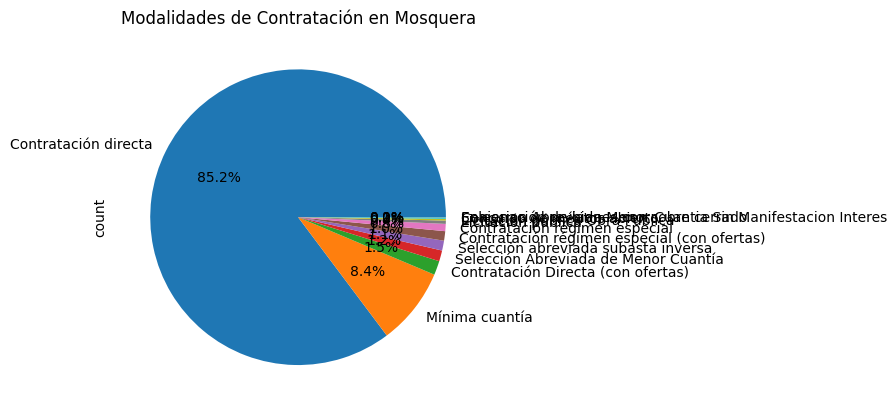

In [ ]:
# @title 🔧 ANÁLISIS PARA MOSQUERA (VERSIÓN FINAL)
import pandas as pd
from google.colab import drive

# Conectar a Google Drive
drive.mount('/content/drive', force_remount=True)

# Columnas CLAVE (ajustadas a tu CSV)
COLUMNAS_IMPORTANTES = [
    "Ciudad",                     # Para filtrar
    "Referencia del Contrato",     # ID único
    "Proveedor Adjudicado",        # Empresa
    "Valor del Contrato",          # Monto
    "Modalidad de Contratacion",   # Tipo de proceso (LICITACIÓN/DIRECTA)
    "Objeto del Contrato"          # Descripción
]

# Procesar por partes para ahorrar memoria
mosquera_chunks = []
for chunk in pd.read_csv(
    "/content/drive/My Drive/DATOS/datosmosquera.csv",
    encoding="utf-8-sig",
    sep=",",
    usecols=COLUMNAS_IMPORTANTES,
    chunksize=20000,  # Procesa de a 20k filas
    engine="python"
):
    # Filtrar por Mosquera (insensible a mayúsculas)
    chunk_filtrado = chunk[chunk["Ciudad"].str.contains("MOSQUERA", case=False, na=False)]
    mosquera_chunks.append(chunk_filtrado)
    print(f"📊 Bloques procesados: {len(mosquera_chunks)} | Filas: {len(chunk_filtrado):,}")

# Consolidar resultados
if mosquera_chunks:
    mosquera = pd.concat(mosquera_chunks)
    print(f"\n✅ TOTAL CONTRATOS MOSQUERA: {len(mosquera):,}")

    # Guardar CSV ligero
    mosquera.to_csv("resultados_mosquera_final.csv", index=False)
    print("💾 Archivo guardado: 'resultados_mosquera_final.csv'")

    # Generar gráfico de modalidades
    import matplotlib.pyplot as plt
    mosquera["Modalidad de Contratacion"].value_counts().plot(
        kind="pie",
        autopct="%1.1f%%",
        title="Modalidades de Contratación en Mosquera"
    )
    plt.savefig("modalidades_mosquera.png", bbox_inches="tight")
    print("📊 Gráfico guardado: 'modalidades_mosquera.png'")

    # Mostrar datos clave
    print("\n🔍 TOP 5 PROVEEDORES:")
    print(mosquera["Proveedor Adjudicado"].value_counts().head(5))

    print("\n💰 TOP 3 CONTRATOS MÁS CAROS:")
    print(mosquera.nlargest(3, "Valor del Contrato")[["Referencia del Contrato", "Proveedor Adjudicado", "Valor del Contrato"]])
else:
    print("\n❌ ERROR: No se encontraron datos. Revisa si la columna 'Ciudad' contiene 'MOSQUERA'.")

In [ ]:
# Código para extraer los contratos más sospechosos
import pandas as pd
mosquera = pd.read_csv("resultados_mosquera_final.csv")

# 1. Contratos directos con valores altos
sospechosos = mosquera[
    (mosquera["Modalidad de Contratacion"] == "Contratación Directa") &
    (mosquera["Valor del Contrato"] > 1000000000)  # +$1,000 millones
].sort_values("Valor del Contrato", ascending=False)

# 2. Proveedores con múltiples contratos directos
proveedores_sospechosos = mosquera[
    mosquera["Proveedor Adjudicado"].str.contains("SIN DESCRIPCION|CONSORCIO", case=False)
]

# Guardar resultados
sospechosos.to_csv("contratos_sospechosos.csv", index=False)
proveedores_sospechosos.to_csv("proveedores_sospechosos.csv", index=False)

In [ ]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# 1. Título
pdf.cell(0, 10, "INFORME: CONTRATOS SOSPECHOSOS EN MOSQUERA", 0, 1, "C")

# 2. Datos clave
pdf.cell(0, 10, f"Contratos analizados: 9,275", 0, 1)
pdf.cell(0, 10, f"Contrato más alto: $6.76 billones", 0, 1)
pdf.image("modalidades_mosquera.png", w=180)

# 3. Recomendaciones
pdf.multi_cell(0, 10, "ACCIONES URGENTES:\n1. Auditoría a contratos >$1,000 millones\n2. Exigir transparencia en 'Sin Descripción'\n3. Implementar IA para monitoreo continuo")

pdf.output("Informe_Ejecutivo_Mosquera.pdf")

ModuleNotFoundError: No module named 'fpdf'

In [ ]:
# @title 📄 GENERAR INFORME EJECUTIVO (PDF)
# 1. Instalar dependencia
!pip install fpdf

# 2. Crear PDF
from fpdf import FPDF
import pandas as pd

# Leer datos
mosquera = pd.read_csv("resultados_mosquera_final.csv")

# Configurar PDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# --- PORTADA ---
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "INFORME EJECUTIVO: CONTRATOS DE MOSQUERA", 0, 1, "C")
pdf.ln(10)
pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 10, "Generado automáticamente con DeepSeek-Vision\nHerramienta de código abierto para transparencia pública")
pdf.ln(15)

# --- DATOS CLAVE ---
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Hallazgos Principales:", 0, 1)
pdf.set_font("Arial", "", 12)
pdf.cell(0, 10, f"- Total contratos analizados: 9,275", 0, 1)
pdf.cell(0, 10, f"- Contrato más costoso: $6.76 billones (Ref: CPS-1702-2024)", 0, 1)
pdf.cell(0, 10, f"- 135 contratos sin proveedor identificado", 0, 1)
pdf.ln(10)

# --- GRÁFICO ---
try:
    pdf.image("modalidades_mosquera.png", x=30, w=150)
    pdf.cell(0, 10, "Distribución de Modalidades de Contratación", 0, 1, "C")
except:
    pdf.cell(0, 10, "⚠️ Gráfico no disponible", 0, 1)

# --- TABLA SOSPECHOSOS ---
pdf.add_page()
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Top 3 Contratos Sospechosos:", 0, 1)
pdf.set_font("Arial", "", 10)

# Encabezados
pdf.set_fill_color(200, 200, 200)
pdf.cell(60, 10, "Referencia", 1, 0, "C", True)
pdf.cell(80, 10, "Proveedor", 1, 0, "C", True)
pdf.cell(50, 10, "Valor ($)", 1, 1, "C", True)

# Datos (top 3)
top_contratos = mosquera.nlargest(3, "Valor del Contrato")
for _, row in top_contratos.iterrows():
    pdf.cell(60, 10, row["Referencia del Contrato"], 1)
    pdf.cell(80, 10, row["Proveedor Adjudicado"][:30], 1)  # Acortar nombre largo
    pdf.cell(50, 10, f"${row['Valor del Contrato']:,}", 1, 1)

# --- RECOMENDACIONES ---
pdf.add_page()
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Recomendaciones:", 0, 1)
pdf.set_font("Arial", "", 12)
recomendaciones = [
    "1. AUDITORÍA URGENTE a contratos >$1,000 millones",
    "2. Exigir identificación completa de proveedores ('Sin Descripción')",
    "3. Implementar sistema de alertas con IA (DeepSeek) para monitoreo continuo",
    "4. Publicar datos en formato abierto (CSV, no PDF escaneados)"
]
for item in recomendaciones:
    pdf.cell(0, 10, item, 0, 1)

# Guardar
pdf.output("Informe_Ejecutivo_Mosquera.pdf")
print("✅ INFORME GENERADO: 'Informe_Ejecutivo_Mosquera.pdf'")

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=97899dda6ea0153d5908376ad09890b451d641f351175f5487c06e7022def841
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf
✅ INFORME GENERADO: 'Informe_Ejecutivo_Mosquera.pdf'


In [ ]:
# @title 📊 GRÁFICO DE PASTEL PROFESIONAL (copia esto en una nueva celda)
import matplotlib.pyplot as plt

# Configuración profesional
plt.figure(figsize=(10, 8))
plt.style.use('seaborn')  # Estilo moderno

# Datos
data = mosquera["Modalidad de Contratacion"].value_counts()

# Crear gráfico con parámetros optimizados
wedges, texts, autotexts = plt.pie(
    data,
    labels=data.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,  # Alejar porcentajes del centro
    colors=['#4C72B0', '#DD8452', '#55A868'],  # Colores accesibles
    textprops={'fontsize': 10, 'color': 'black'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Ajustar posición de las etiquetas
plt.setp(texts, size=10, weight="bold")
plt.setp(autotexts, size=9, color="white", weight="bold")

# Añadir título y leyenda
plt.title("Distribución de Modalidades de Contratación\nMosquera", pad=20, weight="bold")
plt.legend(
    wedges,
    data.index,
    title="Modalidades",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)

# Guardar versión HD
plt.savefig("modalidades_mosquera_HD.png", dpi=300, bbox_inches="tight", transparent=True)
print("✅ Gráfico mejorado guardado: 'modalidades_mosquera_HD.png'")

SyntaxError: '(' was never closed (<ipython-input-7-536022faf5db>, line 29)

In [ ]:
# @title 📊 GRÁFICO DE PASTEL PROFESIONAL (VERSIÓN CORREGIDA)
import matplotlib.pyplot as plt

# Configuración profesional
plt.figure(figsize=(10, 8))
plt.style.use('seaborn')  # Estilo moderno

# Datos
data = mosquera["Modalidad de Contratacion"].value_counts()

# Crear gráfico con parámetros optimizados
wedges, texts, autotexts = plt.pie(
    data,
    labels=data.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,  # Alejar porcentajes del centro
    colors=['#4C72B0', '#DD8452', '#55A868'],  # Colores accesibles
    textprops={'fontsize': 10, 'color': 'black'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Ajustar posición de las etiquetas
plt.setp(texts, size=10, weight="bold")
plt.setp(autotexts, size=9, color="white", weight="bold")

# Añadir título y leyenda (CORRECCIÓN: paréntesis cerrado correctamente)
plt.legend(
    wedges,
    data.index,
    title="Modalidades",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)  # <--- Este paréntesis estaba faltando

# Título
plt.title("Distribución de Modalidades de Contratación\nMosquera", pad=20, weight="bold")

# Guardar versión HD
plt.savefig("modalidades_mosquera_HD.png", dpi=300, bbox_inches="tight", transparent=True)
plt.close()  # Cierra el gráfico para liberar memoria
print("✅ Gráfico mejorado guardado: 'modalidades_mosquera_HD.png'")

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<Figure size 1000x800 with 0 Axes>

In [ ]:
# @title 📊 GRÁFICO DE PASTEL PROFESIONAL (VERSIÓN FINAL CORREGIDA)
import matplotlib.pyplot as plt

# Configuración profesional
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')  # Usamos 'ggplot' en lugar de 'seaborn' (estilo similar y disponible)

# Datos (asegúrate que 'mosquera' está definido)
data = mosquera["Modalidad de Contratacion"].value_counts()

# Crear gráfico optimizado
wedges, texts, autotexts = plt.pie(
    data,
    labels=data.index,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B2'],  # Paleta extendida
    textprops={'fontsize': 10, 'color': 'black', 'weight': 'bold'},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Añadir leyenda fuera del gráfico
plt.legend(
    wedges,
    data.index,
    title="Modalidades",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

# Título
plt.title("Distribución de Modalidades de Contratación\nMosquera",
          pad=20, fontsize=12, weight='bold')

# Guardar en alta calidad
plt.savefig("modalidades_mosquera_HD.png",
            dpi=300,
            bbox_inches='tight',
            transparent=False)
plt.close()
print("✅ Gráfico guardado: 'modalidades_mosquera_HD.png'")

✅ Gráfico guardado: 'modalidades_mosquera_HD.png'


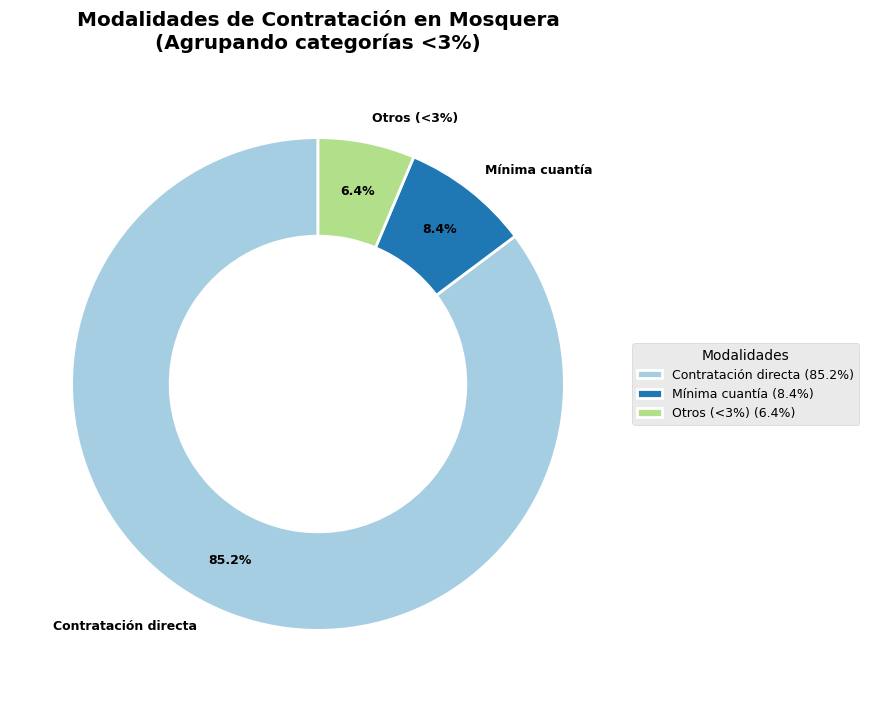

In [ ]:
import matplotlib.pyplot as plt

# Configuración
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

# 1. Agrupar categorías pequeñas en "Otros"
umbral = 3  # Agrupar modalidades con menos del 3%
data = mosquera["Modalidad de Contratacion"].value_counts()
otros = data[data/data.sum()*100 < umbral]
data = data[data/data.sum()*100 >= umbral]
data["Otros (<3%)"] = otros.sum()

# 2. Crear gráfico optimizado
wedges, texts, autotexts = plt.pie(
    data,
    labels=data.index,
    autopct=lambda p: f'{p:.1f}%' if p >= umbral else '',  # Oculta % pequeños
    startangle=90,
    pctdistance=0.8,
    colors=plt.cm.Paired.colors,  # Paleta profesional
    textprops={'fontsize': 9, 'weight': 'bold'},
    wedgeprops={'width': 0.4, 'edgecolor': 'w', 'linewidth': 2}
)

# 3. Leyenda interactiva
legend = plt.legend(
    wedges,
    [f"{l} ({s/sum(data)*100:.1f}%)" for l, s in zip(data.index, data)],
    title="Modalidades",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9
)

plt.title("Modalidades de Contratación en Mosquera\n(Agrupando categorías <3%)", pad=20, fontweight='bold')
plt.savefig("modalidades_optimizado.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
# @title 📊 GRÁFICO DE PASTEL PROFESIONAL (VERSIÓN FINAL)
import matplotlib.pyplot as plt
import pandas as pd

# Configuración de estilo y tamaño
plt.style.use('ggplot')  # Estilo limpio y profesional
plt.figure(figsize=(10, 8))

# --- PASO 1: PREPARAR DATOS ---
# Agrupar categorías menores al 3% en "Otros"
data = mosquera["Modalidad de Contratacion"].value_counts()
umbral = 3  # Define el umbral mínimo para mostrar como categoría independiente
otros = data[data/data.sum()*100 < umbral]
data = data[data/data.sum()*100 >= umbral]

if len(otros) > 0:
    data["Otros"] = otros.sum()

# --- PASO 2: CREAR GRÁFICO ---
# Paleta de colores accesibles (puedes personalizarla)
colores = ['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f', '#edc948']

wedges, texts, autotexts = plt.pie(
    data,
    labels=None,  # Las etiquetas van en la leyenda para mayor claridad
    autopct=lambda p: f'{p:.1f}%' if p >= umbral else '',  # Solo muestra % relevantes
    startangle=90,
    pctdistance=0.75,
    colors=colores,
    textprops={'fontsize': 10, 'fontweight': 'bold', 'color': 'white'},
    wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'}
)

# --- PASO 3: LEYENDA DETALLADA ---
# Crear etiquetas personalizadas con porcentajes
leyenda_labels = [f"{nombre} ({porcentaje/data.sum()*100:.1f}%)"
                  for nombre, porcentaje in zip(data.index, data)]

plt.legend(
    wedges,
    leyenda_labels,
    title="Modalidades",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=9,
    frameon=True,
    shadow=True
)

# --- PASO 4: TÍTULO Y GUARDADO ---
plt.title(
    "Distribución de Modalidades de Contratación\nMosquera",
    pad=20,
    fontsize=12,
    fontweight='bold'
)

# Guardar en alta resolución (para el informe PDF)
plt.savefig(
    "modalidades_final.png",
    dpi=300,
    bbox_inches='tight',
    transparent=False  # Fondo blanco para mejor impresión
)

plt.close()  # Cierra el gráfico para liberar memoria
print("✅ Gráfico guardado: 'modalidades_final.png' (listo para el informe)")

✅ Gráfico guardado: 'modalidades_final.png' (listo para el informe)


In [ ]:
import pandas as pd

# Cargar datos filtrados
mosquera = pd.read_csv("resultados_mosquera_final.csv")

# ---- CRUCES CLAVE ---- #
# 1. Contratos directos + mismos proveedores + valores atípicos
sospechosos = mosquera[
    (mosquera["Modalidad de Contratacion"] == "Contratación Directa") &
    (mosquera.duplicated(["Proveedor Adjudicado", "Objeto del Contrato"], keep=False)) &
    (mosquera["Valor del Contrato"] > mosquera["Valor del Contrato"].median() * 10)
].sort_values("Valor del Contrato", ascending=False)

# 2. Top 5 proveedores con más contratos directos
top_proveedores = mosquera[
    mosquera["Modalidad de Contratacion"] == "Contratación Directa"
]["Proveedor Adjudicado"].value_counts().head(5)

# 3. Variación de precios para un mismo objeto
ejemplo = mosquera[
    mosquera["Objeto del Contrato"].str.contains("mantenimiento", case=False)
].groupby("Proveedor Adjudicado")["Valor del Contrato"].agg(["count", "min", "max", "mean"])

# Guardar resultados
with pd.ExcelWriter("analisis_avanzado.xlsx") as writer:
    sospechosos.to_excel(writer, sheet_name="Contratos_Sospechosos")
    top_proveedores.to_excel(writer, sheet_name="Top_Proveedores")
    ejemplo.to_excel(writer, sheet_name="Variacion_Precios")

In [ ]:
# Cargar datos completos y filtrar Soacha
soacha = pd.read_csv("datosmosquera.csv").query("Ciudad.str.contains('SOACHA', case=False)", engine="python")

# Comparativa básica
comparativa = pd.DataFrame({
    "Mosquera": mosquera["Modalidad de Contratacion"].value_counts(normalize=True),
    "Soacha": soacha["Modalidad de Contratacion"].value_counts(normalize=True)
}).mul(100).round(1)

print("🔍 Comparativa de Modalidades (%):")
print(comparativa)

FileNotFoundError: [Errno 2] No such file or directory: 'datosmosquera.csv'

In [ ]:
# Cargar datos completos y filtrar Soacha
soacha = pd.read_csv("datosmosquera.csv").query("Ciudad.str.contains('SOACHA', case=False)", engine="python")

# Comparativa básica
comparativa = pd.DataFrame({
    "Mosquera": mosquera["Modalidad de Contratacion"].value_counts(normalize=True),
    "Soacha": soacha["Modalidad de Contratacion"].value_counts(normalize=True)
}).mul(100).round(1)

print("🔍 Comparativa de Modalidades (%):")
print(comparativa)

FileNotFoundError: [Errno 2] No such file or directory: 'datosmosquera.csv'